# **EXPLORATORY DATA ANALYSIS**

## Airline Quality Ratings

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing required sklearn libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# importing library for model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# metrics sklearn library
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

# removing harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df=pd.read_csv("Airline_Quality_Ratings.csv")

# sample data
df.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## Overview of DataFrame

In [3]:
# Number of rows and columns
print(f"DataSet has {df.shape[0]} rows and {df.shape[1]} columns.")

DataSet has 129880 rows and 24 columns.


In [4]:
# Number of Numerical and Categorical Columns
numeric_count=0
category_count=0

# Looping Statement
for col in df.columns:
  if df[col].dtype=='O':
    category_count+=1
  else:
    numeric_count +=1

print(f"Count of Numeric Columns : {numeric_count}")
print(f"Count of Category Columns : {category_count}")

Count of Numeric Columns : 19
Count of Category Columns : 5


In [5]:
# Number of Unique Values in Numeric Columns
for col in df.columns:
  if df[col].dtype!='O':
    if df[col].nunique()==1 or df[col].nunique()==df.shape[0]:
      print(f"*** {col} Columns has {df[col].nunique()} unique values**")
    else :
      print(f"{col} Columns has {df[col].nunique()} unique values.")

*** ID Columns has 129880 unique values**
Age Columns has 75 unique values.
Flight Distance Columns has 3821 unique values.
Departure Delay Columns has 466 unique values.
Arrival Delay Columns has 472 unique values.
Departure and Arrival Time Convenience Columns has 6 unique values.
Ease of Online Booking Columns has 6 unique values.
Check-in Service Columns has 6 unique values.
Online Boarding Columns has 6 unique values.
Gate Location Columns has 6 unique values.
On-board Service Columns has 6 unique values.
Seat Comfort Columns has 6 unique values.
Leg Room Service Columns has 6 unique values.
Cleanliness Columns has 6 unique values.
Food and Drink Columns has 6 unique values.
In-flight Service Columns has 6 unique values.
In-flight Wifi Service Columns has 6 unique values.
In-flight Entertainment Columns has 6 unique values.
Baggage Handling Columns has 5 unique values.


In [6]:
# Number of Unique values in categorical columns
for col in df.columns:
  if df[col].dtype=='O':
    if df[col].nunique()==1:
      print(f"** {col} Column has {df[col].nunique()} unique values **")
    else :
      print(f"{col} Column has {df[col].nunique()} unique values.")

Gender Column has 2 unique values.
Customer Type Column has 2 unique values.
Type of Travel Column has 2 unique values.
Class Column has 3 unique values.
Satisfaction Column has 2 unique values.


- Dropping the ID Column from dataset as it PII(Personally Identifiable Information) and doesn't contribute to the Analysis

In [7]:
df.columns=df.columns.str.replace(" ","_")

In [8]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer_Type', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check-in_Service', 'Online_Boarding', 'Gate_Location',
       'On-board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In-flight_Service', 'In-flight_Wifi_Service',
       'In-flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

## Data Cleaning - Preprocessing

In [9]:
# Creating sample dataframe for checking null percentage and dtype of each columns

sample_df=pd.DataFrame({'null_percenatge':round(df.isna().mean()*100,2),
                        'dtype': df.dtypes})

sample_df=pd.concat([sample_df,df.head(2).T],axis=1)
sample_df

,null_percenatge,dtype,0,1
ID,0.0,int64,1,2
Gender,0.0,object,Male,Female
Age,0.0,int64,48,35
Customer_Type,0.0,object,First-time,Returning
Type_of_Travel,0.0,object,Business,Business
Class,0.0,object,Business,Business
Flight_Distance,0.0,int64,821,821
Departure_Delay,0.0,int64,2,26
Arrival_Delay,0.3,float64,5.0,39.0
Departure_and_Arrival_Time_Convenience,0.0,int64,3,2


- Only **Arrival Delay** Column has null values and needs to be treated/removed.

In [10]:
# Dropping 'ID' column

df=df.drop(['ID'],axis=1)

print(f"After dropping, the number of columns available are : {df.shape[1]}")

After dropping, the number of columns available are : 23


In [11]:
# Checking for duplicated columns

print(f"There is {df.duplicated().sum()} duplicated rows in the dataset")

There is 0 duplicated rows in the dataset


## Analyzing Target Variable

In [12]:
# Analysing Target Variables

print(f"Target Variable has {df['Satisfaction'].nunique()} unique values : {df['Satisfaction'].unique()}\n")

print("Percentage of each Unique values\n")
df['Satisfaction'].value_counts(normalize=True)*100

Target Variable has 2 unique values : ['Neutral or Dissatisfied' 'Satisfied']

Percentage of each Unique values



,proportion
Satisfaction,
Neutral or Dissatisfied,56.553742
Satisfied,43.446258


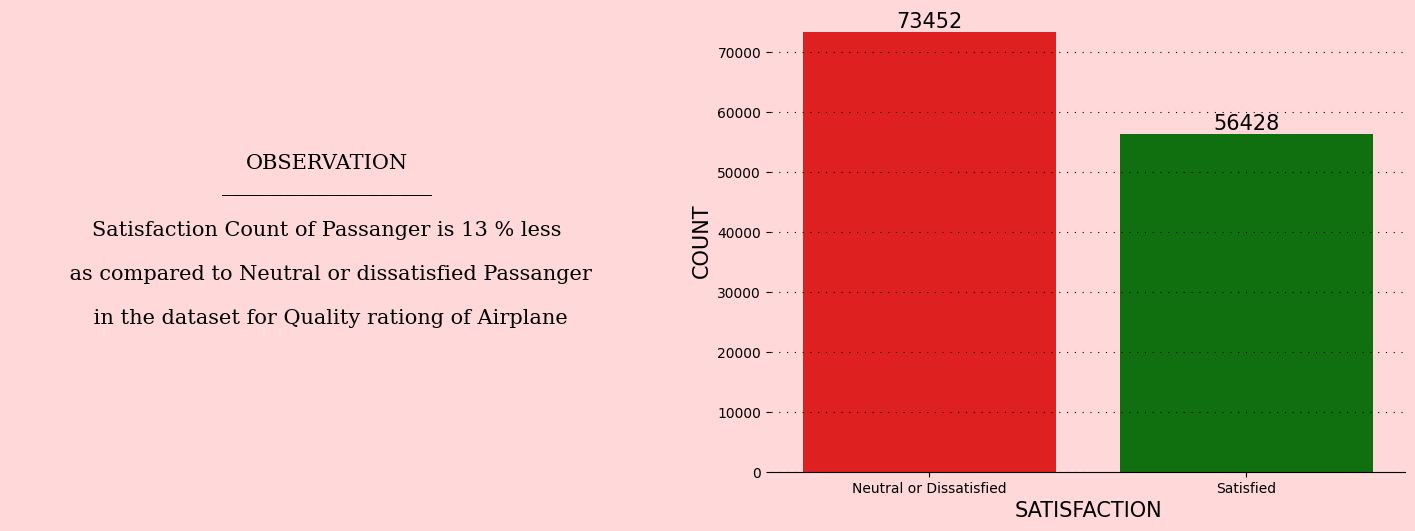

In [13]:
fig=plt.figure(figsize=(18,6))
spec=fig.add_gridspec(1,2)
sec1=fig.add_subplot(spec[0,0])
sec2=fig.add_subplot(spec[0,1])

# adding face color
for section in [fig,sec1,sec2]:
  section.set_facecolor("#ffd9d9")

# Plotting graph for target variable
ax=sns.countplot(data=df,x='Satisfaction',palette=['red','green'])
ax.bar_label(ax.containers[0],size=15)
ax.bar_label(ax.containers[1],size=15)
plt.xlabel('SATISFACTION',size=15)
plt.ylabel('COUNT',size=15)
sec2.grid(ls=":",axis='y',color='black',dashes=(1,6))


# Observation of Target Variable
sec1.text(0.5,0.5,"OBSERVATION\n____________________\n\nSatisfaction Count of Passanger is 13 % less\n\n as compared to Neutral or dissatisfied Passanger\n\n in the dataset for Quality rationg of Airplane",
          ha='center',va='center',fontfamily='serif',size=15)

# removing x-axis and y-axis
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

# removing the spines from plot
for section in [sec1,sec2]:
  for position in ['top','bottom','left','right']:
    if section==sec2 and position=='bottom':
      continue
    else:
      section.spines[position].set_visible(False)

plt.show()

In [14]:
# Selecting numeric column names from dataset
numeric_colmn=[]
for col in df.columns:
  if df[col].dtype!='O':
    numeric_colmn.append(col)
print("Numerical Column available in the dataset : \n")
for col in numeric_colmn:
  print(col)

Numerical Column available in the dataset : 

Age
Flight_Distance
Departure_Delay
Arrival_Delay
Departure_and_Arrival_Time_Convenience
Ease_of_Online_Booking
Check-in_Service
Online_Boarding
Gate_Location
On-board_Service
Seat_Comfort
Leg_Room_Service
Cleanliness
Food_and_Drink
In-flight_Service
In-flight_Wifi_Service
In-flight_Entertainment
Baggage_Handling


In [15]:
df['Flight_Distance'].value_counts()

,count
Flight_Distance,
337,841
594,505
404,480
862,473
2475,470
...,...
1336,1
1078,1
1019,1


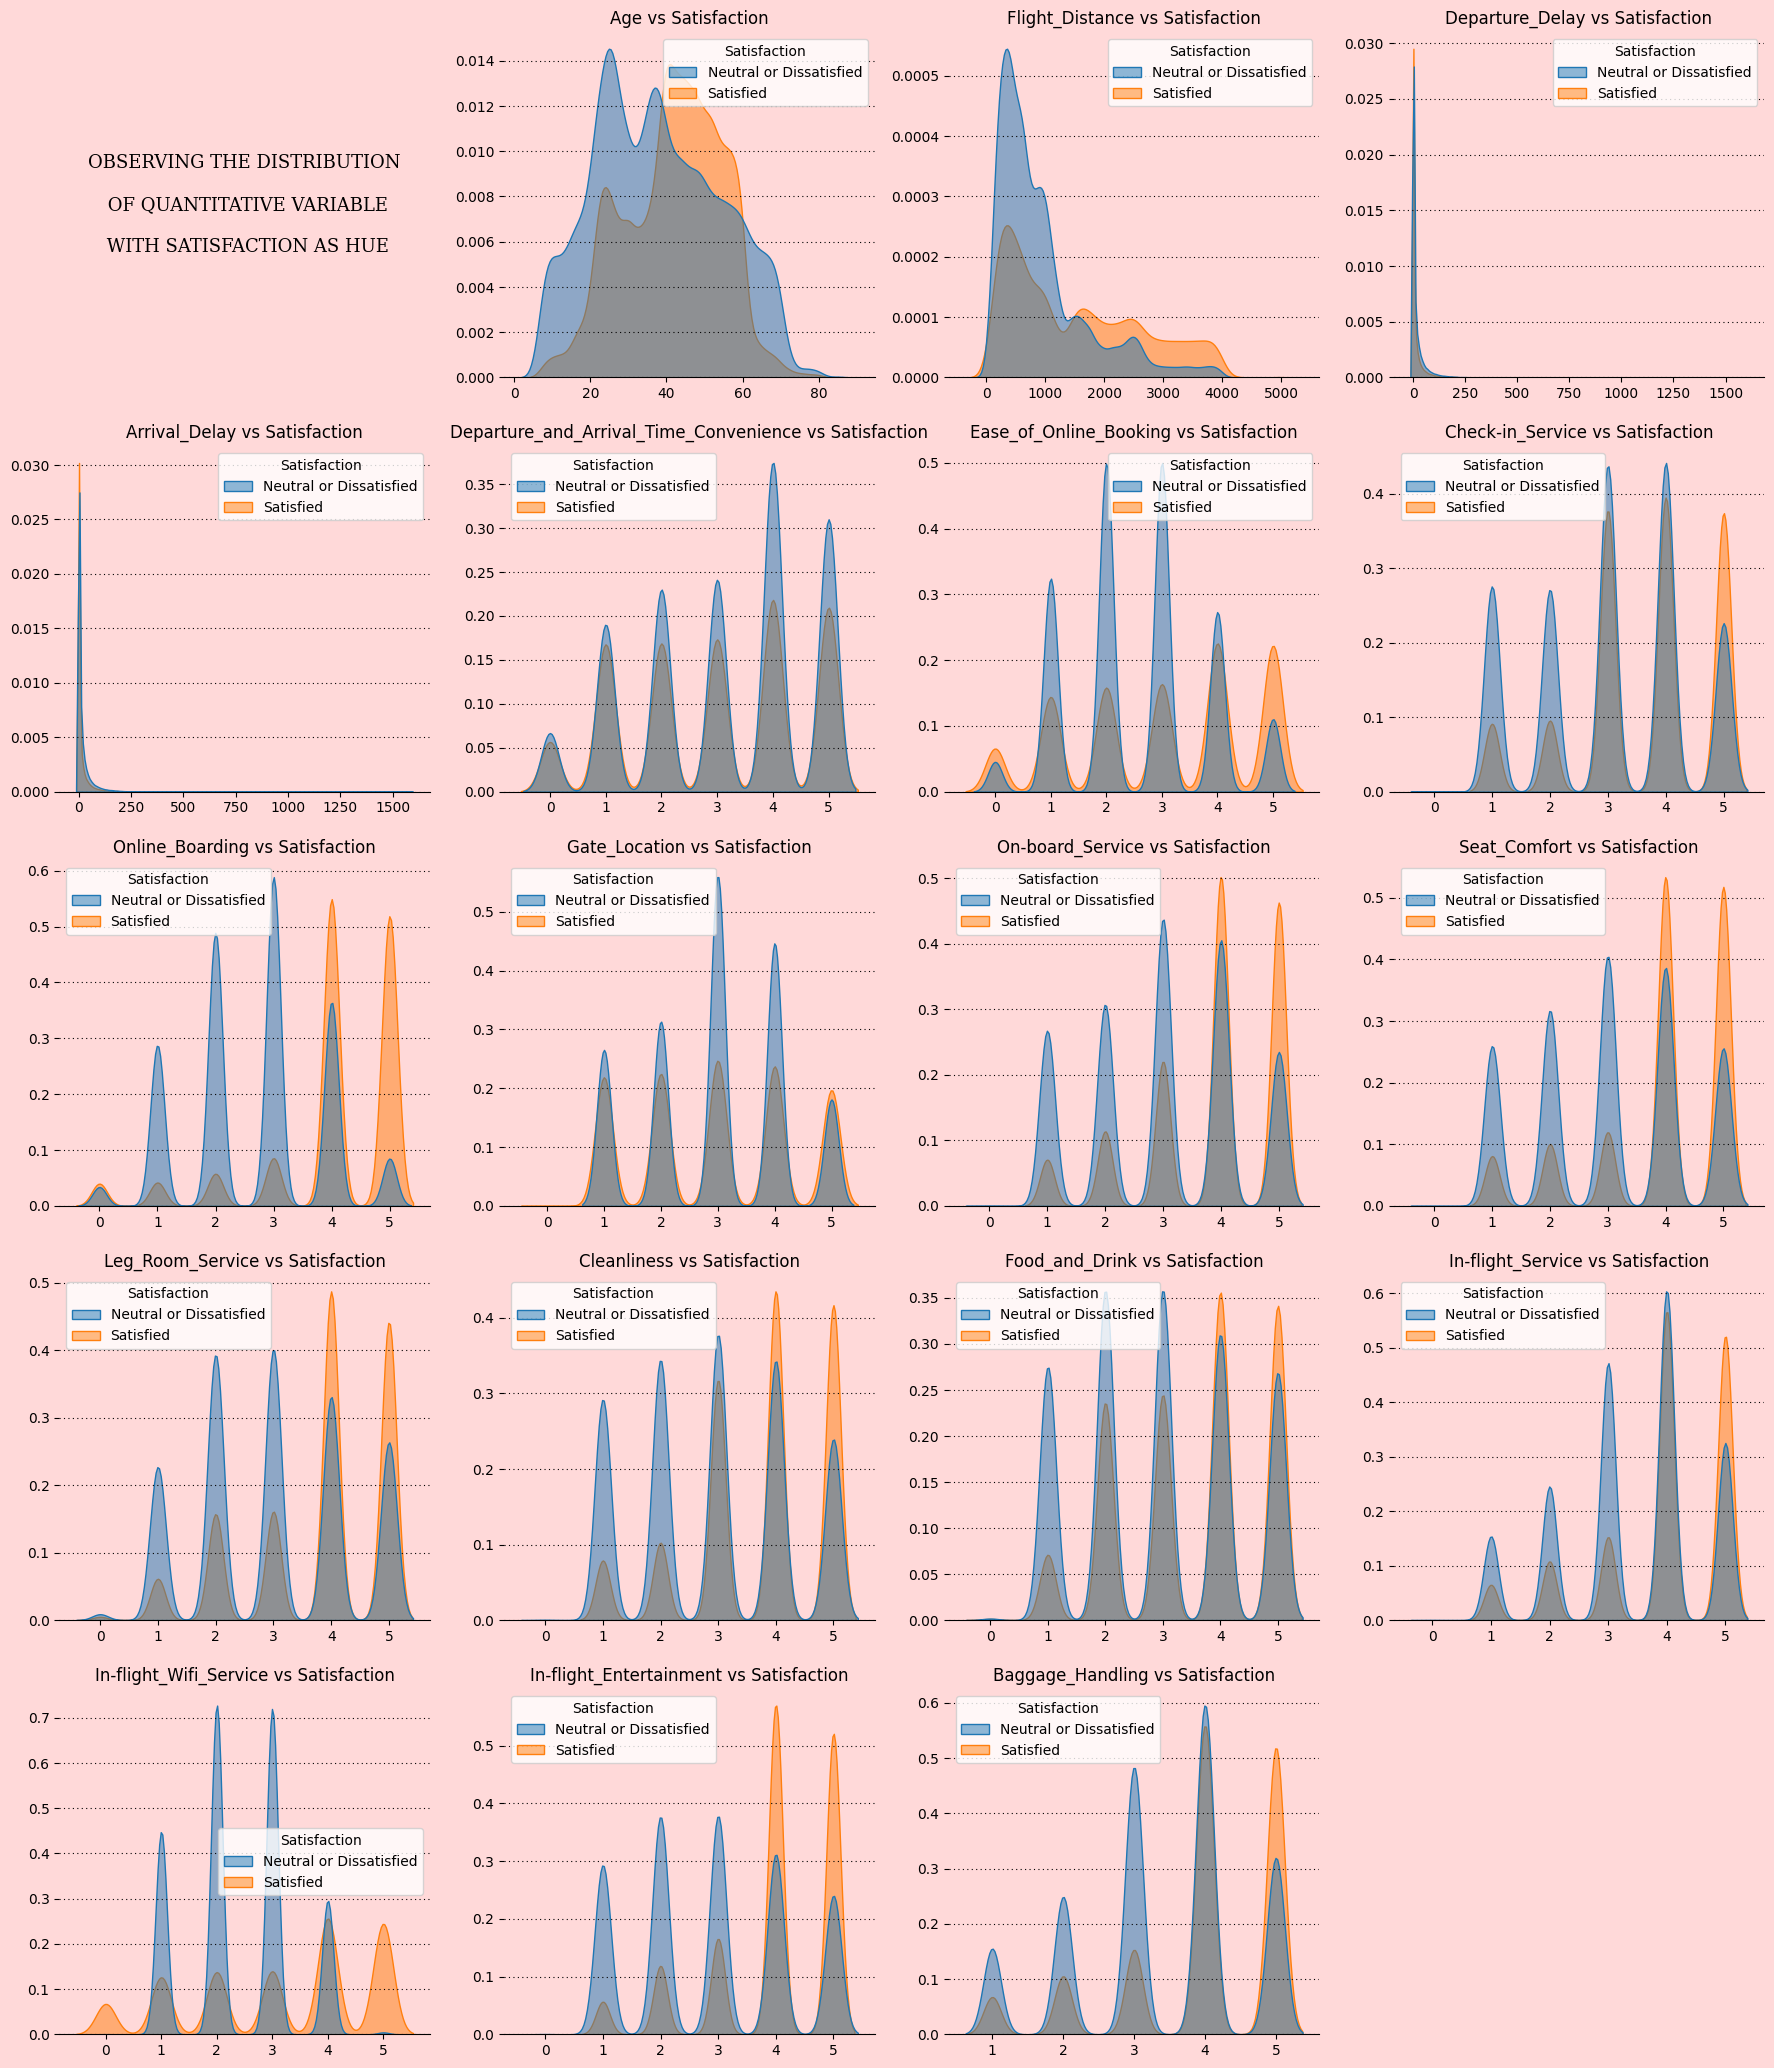

In [16]:
# Analysing all Numerical Columns with respect to target variables.

fig=plt.figure(figsize=(22,26))
specs=fig.add_gridspec(5,4)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[0,2])
sec4=fig.add_subplot(specs[0,3])
sec5=fig.add_subplot(specs[1,0])
sec6=fig.add_subplot(specs[1,1])
sec7=fig.add_subplot(specs[1,2])
sec8=fig.add_subplot(specs[1,3])
sec9=fig.add_subplot(specs[2,0])
sec10=fig.add_subplot(specs[2,1])
sec11=fig.add_subplot(specs[2,2])
sec12=fig.add_subplot(specs[2,3])
sec13=fig.add_subplot(specs[3,0])
sec14=fig.add_subplot(specs[3,1])
sec15=fig.add_subplot(specs[3,2])
sec16=fig.add_subplot(specs[3,3])
sec17=fig.add_subplot(specs[4,0])
sec18=fig.add_subplot(specs[4,1])
sec19=fig.add_subplot(specs[4,2])


# adding facecolor
face_color="#ffd9d9"
for section in [fig,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15,sec16,sec17,sec18,sec19]:
  section.set_facecolor("#ffd9d9")

#list of sections in the plot
section=[sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15,sec16,sec17,sec18,sec19]

#plotting the kde plot for viewing the distribution
cnt=0
for col in df.columns:
  if df[col].dtype != 'O':
    sns.kdeplot(data=df,x=col,hue='Satisfaction',fill=True, ax=section[cnt],alpha=0.5)
    section[cnt].set_xlabel('')
    section[cnt].set_ylabel('')
    section[cnt].set_title(f"{col} vs Satisfaction")
    section[cnt].grid(axis='y',ls=':',dashes=(1,3),color='black')
    cnt+=1

# removing the spines
for sec in section:
  for position in ['left','right','top']:
    sec.spines[position].set_visible(False)

#Observation
sec1.text(0.5,0.5,"OBSERVING THE DISTRIBUTION\n\n OF QUANTITATIVE VARIABLE\n\n WITH SATISFACTION AS HUE",
          ha='center',va='center',fontfamily='serif',size=13)

# removing the axis and spines for observation
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)
for position in ['left','right','top','bottom']:
  sec1.spines[position].set_visible(False)

plt.show()

In [17]:
# Selecting all the categorical column
category_column=[]
for col in df.columns:
  if df[col].dtype=='O' and col!='Satisfaction':
    category_column.append(col)
print("Categorical Column available in the dataset : \n")
for col in category_column:
  print(col)

Categorical Column available in the dataset : 

Gender
Customer_Type
Type_of_Travel
Class


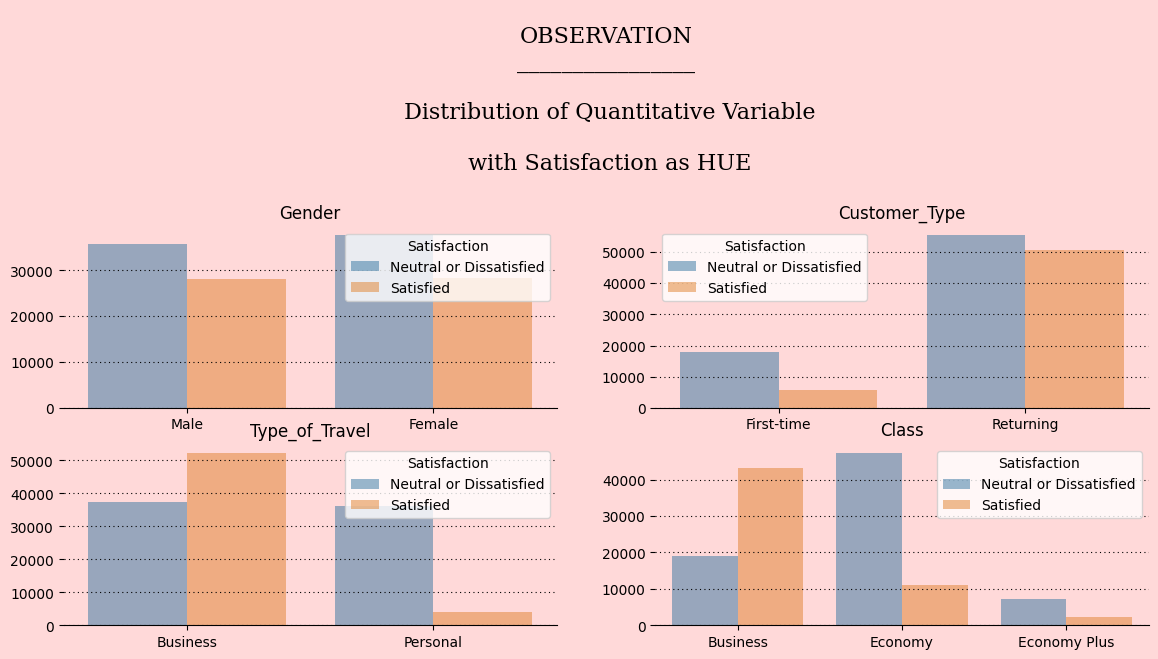

In [18]:
# Observing the Distribution of Categorical Column

fig=plt.figure(figsize=(14,8))
specs=fig.add_gridspec(3,2)
sec1=fig.add_subplot(specs[0,:])
sec2=fig.add_subplot(specs[1,0])
sec3=fig.add_subplot(specs[1,1])
sec4=fig.add_subplot(specs[2,0])
sec5=fig.add_subplot(specs[2,1])


#adding the facecolor
for section in [fig,sec1,sec2,sec3,sec4,sec5]:
  section.set_facecolor("#ffd9d9")

# selecting the section in the plot
section=[sec1,sec2,sec3,sec4,sec5]
# plotting the graph
cnt=1
for col in category_column:
    sns.countplot(data=df,x=col,hue='Satisfaction',ax=section[cnt],alpha=0.5)
    section[cnt].set_title(f"{col}")
    section[cnt].set_xlabel('')
    section[cnt].set_ylabel('')
    section[cnt].grid(axis='y',ls=':',dashes=(1,3),color='black')
    cnt+=1

#removing the axis :
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

# removing the spines from the plot
for sec in section:
  for position in ['bottom','left','right','top']:
    if sec!=sec1 and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)

sec1.text(0.5,0.5,"OBSERVATION\n________________\n\n Distribution of Quantitative Variable\n\n with Satisfaction as HUE",fontfamily='serif',ha='center',va='center',size=16)

plt.show()

- OBSERVATION ON QUANTITATIVE AND QUALITATIVE COLUMN WITH HUE SATISFACTION
 - Passenger between the age 20-40 are more neutral or dissatisfied and between 40-60 are more satisfied
 - Passenger travelling for short distance between 300-1300 km are more in count and in which Neutral or dissatisfied Count is more as compared to Satisfied count.
 - Passenger travel for Business Purpose has more Satisfied Count as compared to people travel for their own Personal Reason
 - Passenger in Economy Class has more count of Neutral or Dissatisfied while in Business Class Satisfied Count is more.

# UNIVARIATE ANALYSIS

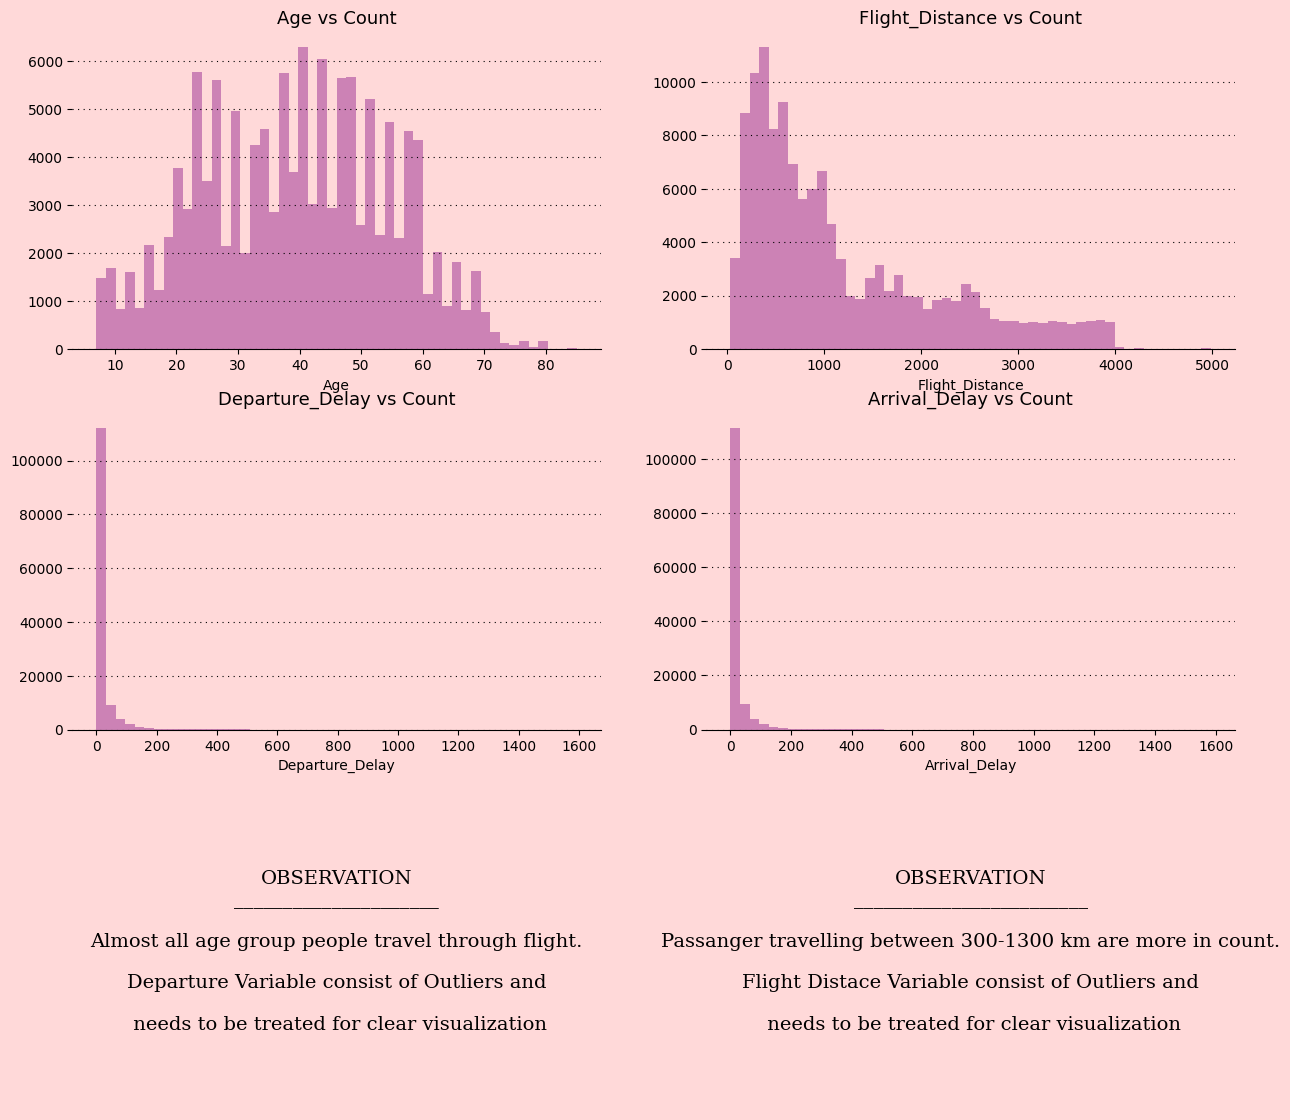

In [19]:
# DISTRIBUTION OF QUALITATIVE VARIABLES WITH MORE THAN 10 DISTINCT VALUES

fig=plt.figure(figsize=(15,14))
specs=fig.add_gridspec(3,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[1,0])
sec4=fig.add_subplot(specs[1,1])
sec5=fig.add_subplot(specs[2,0])
sec6=fig.add_subplot(specs[2,1])

# adding facecolor
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6]:
  sec.set_facecolor("#ffd9d9")

#list of subplot
section=[sec1,sec2,sec3,sec4]

#plotting graph
cnt=0
for col in numeric_colmn:
  if df[col].nunique()>10:
    sns.distplot(x=df[col],kde=False,ax=section[cnt],color='purple')
    section[cnt].set_title(f"{col} vs Count",size=13)
    section[cnt].set_xlabel(f"{col}\n",size=10)
    section[cnt].set_ylabel("")
    section[cnt].grid(axis='y',ls=":",dashes=(1,4),color='black',)
    cnt+=1

#removing the axis for Observation
for axis in [sec5,sec6]:
  axis.xaxis.set_visible(False)
  axis.yaxis.set_visible(False)

#removing the spines from plt
for sec in [sec1,sec2,sec3,sec4,sec5,sec6]:
  for position in ['bottom','left','right','top']:
    if sec in [sec1,sec2,sec3,sec4] and position =='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)

# Observation
sec5.text(0.5,0.5,f"OBSERVATION\n_____________________\n\n\
Almost all age group people travel through flight.\n\nDeparture Variable consist of Outliers and\n\n\
 needs to be treated for clear visualization",
          va='center',ha='center',fontfamily='serif',size=14)

sec6.text(0.5,0.5,"OBSERVATION\n________________________\n\n\
Passanger travelling between 300-1300 km are more in count.\n\n\
Flight Distace Variable consist of Outliers and\n\n needs to be treated for clear visualization",
          va='center',ha='center',fontfamily='serif',size=14)

plt.show()

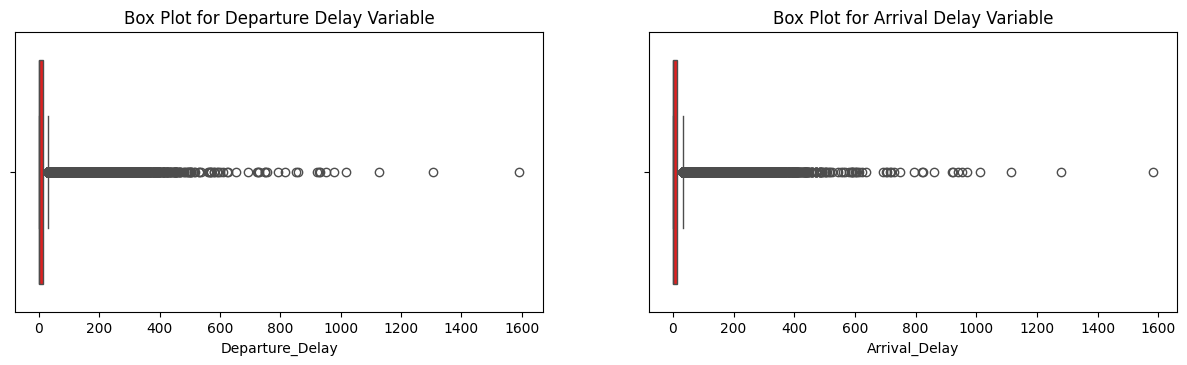

In [20]:
# Checking for present of outliers
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Departure_Delay',color='red')
plt.title("Box Plot for Departure Delay Variable")

#Boxplot for Arrival Delay Column
plt.subplot(2,2,2)
sns.boxplot(data=df,x='Arrival_Delay',color='red')
plt.title("Box Plot for Arrival Delay Variable")
plt.show()

In [21]:
# Statistical Information for Departure Delay Column
print("Column : Departure Delay")
print(f"MINIMUM VALUE : {df['Departure_Delay'].min()}")
print(f"MAXIMUM VALUE : {df['Departure_Delay'].mean()}")
print(f"MEAN : {df['Departure_Delay'].max()}")
print(f"97% of data : {df['Departure_Delay'].quantile(0.97)}")
print(f"99% of data : {df['Departure_Delay'].quantile(0.99)}")
print(f"100% of data : {df['Departure_Delay'].quantile(1)}")


Column : Departure Delay
MINIMUM VALUE : 0
MAXIMUM VALUE : 14.713712657838004
MEAN : 1592
97% of data : 107.0
99% of data : 180.0
100% of data : 1592.0


In [22]:
# Statistical Information for Departure Delay Column
print("Column : Arrival Delay")
print(f"MINIMUM VALUE : {df['Arrival_Delay'].min()}")
print(f"MAXIMUM VALUE : {df['Arrival_Delay'].mean()}")
print(f"MEAN : {df['Arrival_Delay'].max()}")
print(f"97% of data : {df['Arrival_Delay'].quantile(0.97)}")
print(f"99% of data : {df['Arrival_Delay'].quantile(0.99)}")
print(f"100% of data : {df['Arrival_Delay'].quantile(1)}")


Column : Arrival Delay
MINIMUM VALUE : 0.0
MAXIMUM VALUE : 15.09112883918849
MEAN : 1584.0
97% of data : 108.0
99% of data : 182.0
100% of data : 1584.0


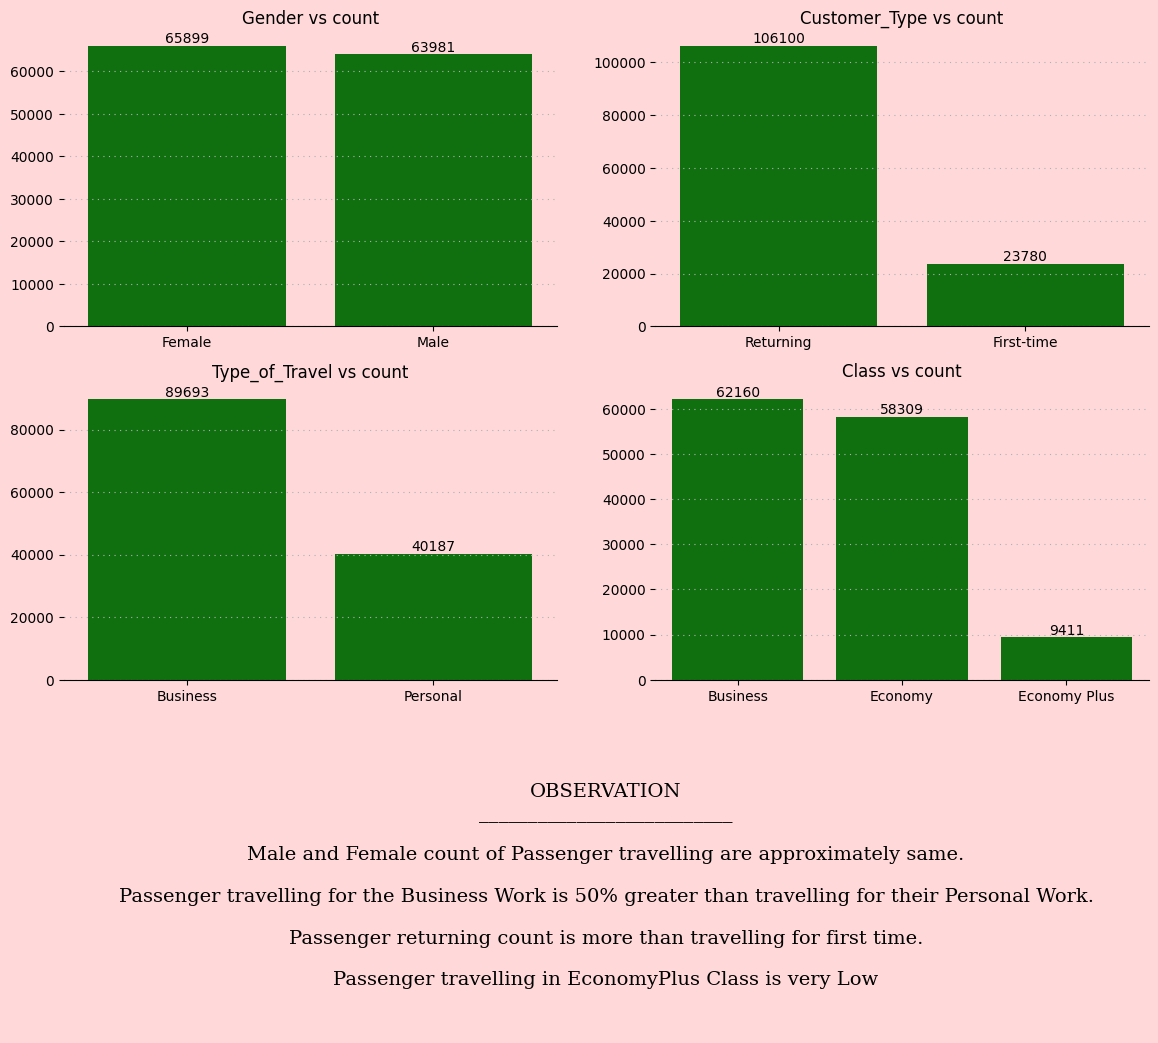

In [23]:
# DISTRIBUTION OF QUANTITATIVE VARIABLES

fig=plt.figure(figsize=(14,13))
specs=fig.add_gridspec(3,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])
sec3=fig.add_subplot(specs[1,0])
sec4=fig.add_subplot(specs[1,1])
sec5=fig.add_subplot(specs[2,:])

#adding facecolor
for section in [fig,sec1,sec2,sec3,sec4,sec5]:
  section.set_facecolor("#ffd9d9")

#list of section from plot
section=[sec1,sec2,sec3,sec4]

#plotting the graph
cnt=0
for col in category_column:
  ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,
                ax=section[cnt],color='green')
  ax.bar_label(ax.containers[0])
  section[cnt].set_title(f"{col} vs count")
  section[cnt].set_xlabel('')
  section[cnt].set_ylabel('')
  section[cnt].grid(axis='y',ls=":",dashes=(1,4))
  cnt+=1

#removing the axis for observation
sec5.xaxis.set_visible(False)
sec5.yaxis.set_visible(False)

# Observation from the plot visualization

sec5.text(0.5,0.5,"OBSERVATION\n__________________________\n\n\
Male and Female count of Passenger travelling are approximately same.\n\n\
Passenger travelling for the Business Work is 50% greater than travelling for their Personal Work.\n\n\
Passenger returning count is more than travelling for first time.\n\n\
Passenger travelling in EconomyPlus Class is very Low",
          ha='center',va='center',fontfamily='serif',size=14)

#removing the spines
for section in [sec1,sec2,sec3,sec4,sec5]:
  for position in ['left','top','right','bottom']:
    if section in [sec1,sec2,sec3,sec4] and position=='bottom':
      continue
    else:
      section.spines[position].set_visible(False)

plt.show()

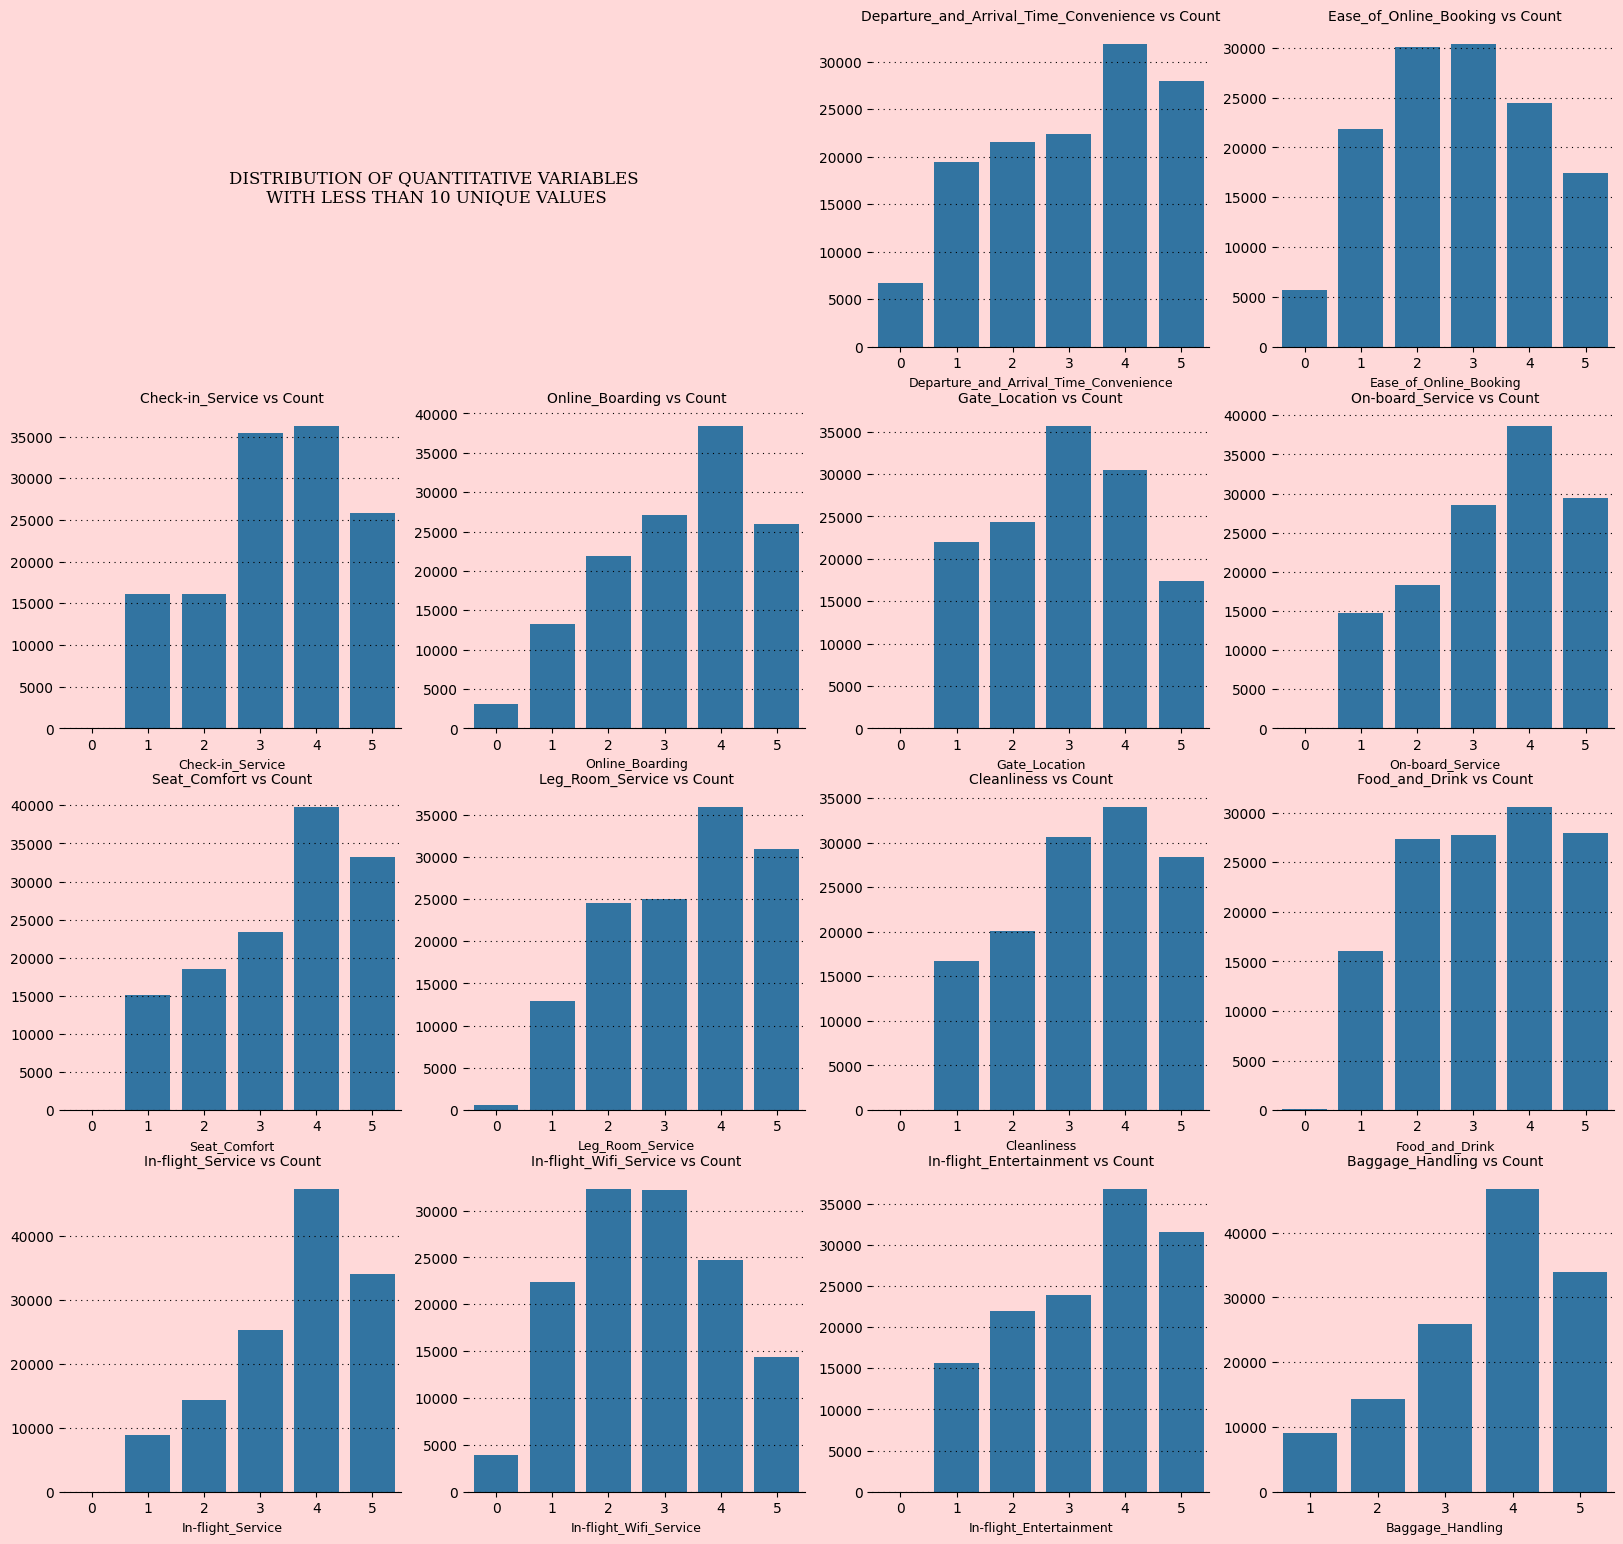

In [24]:
#DISTRIBUTION OF QUALITITATIVE VARIABLE WITH LESS THAN 10 NUMERICAL COLUMN
fig=plt.figure(figsize=(20,19))
specs=fig.add_gridspec(4,4)
spec.update(wspace=0.3, hspace=0.3)
sec1=fig.add_subplot(specs[0,:2])
sec2=fig.add_subplot(specs[0,2])
sec3=fig.add_subplot(specs[0,3])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])
sec7=fig.add_subplot(specs[1,3])
sec8=fig.add_subplot(specs[2,0])
sec9=fig.add_subplot(specs[2,1])
sec10=fig.add_subplot(specs[2,2])
sec11=fig.add_subplot(specs[2,3])
sec12=fig.add_subplot(specs[3,0])
sec13=fig.add_subplot(specs[3,1])
sec14=fig.add_subplot(specs[3,2])
sec15=fig.add_subplot(specs[3,3])

# adding the face color
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]:
  sec.set_facecolor('#ffd9d9')

#list of section of graph
section=[sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]

#plotting the countgraph
cnt=1
for col in numeric_colmn:
  if df[col].nunique()<10:
    sns.countplot(data=df,x=col,ax=section[cnt])
    section[cnt].set_title(f"{col} vs Count",size=10)
    section[cnt].set_xlabel(col,size=9)
    section[cnt].set_ylabel('')
    section[cnt].grid(axis='y',ls=":",dashes=(1,4),color='black')
    cnt+=1

#OBSERVATION
sec1.text(0.5,0.5,"DISTRIBUTION OF QUANTITATIVE VARIABLES\n WITH LESS THAN 10 UNIQUE VALUES",
          ha='center',va='center',size=12,fontfamily='serif')

#removing axis for observation
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

#removing spines for the plot
for sec in section :
  for position in ['bottom','right','left','top']:
    if sec != sec1 and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)


plt.show()

## OUTLIER TREATMENT

In [25]:
# Treating Outliers

#Treating outlier for Departure Delay
df=df[df['Departure_Delay'] < df['Departure_Delay'].quantile(1)]

# Treating outlier for Arrival Delay
df=df[df['Arrival_Delay'] < df['Arrival_Delay'].quantile(1)]

print(f"The dataset consist of {df.shape[0]} rows and {df.shape[1]} columns after Treating the outlier")

The dataset consist of 129485 rows and 23 columns after Treating the outlier


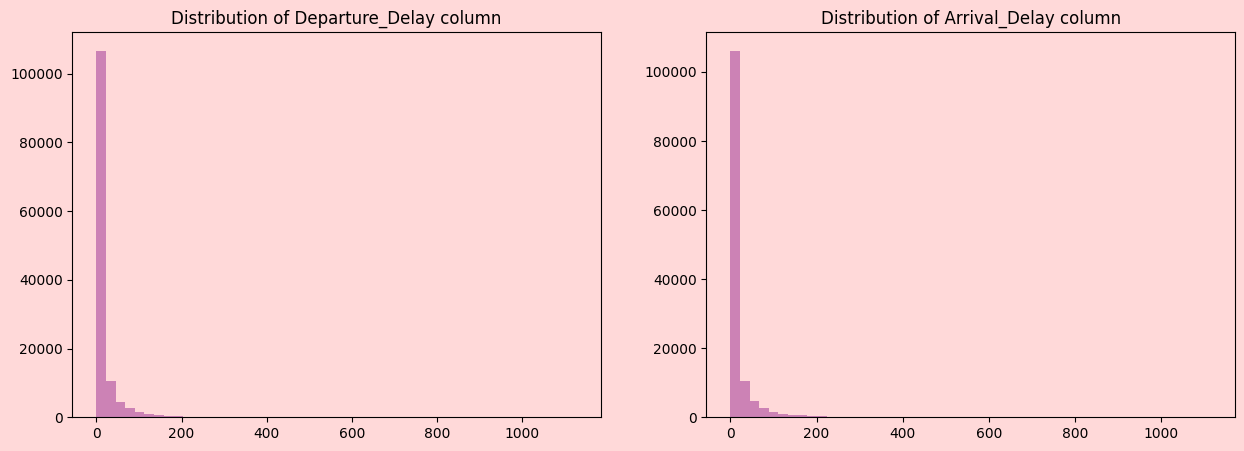

In [26]:
fig=plt.figure(figsize=(15,5))
specs=fig.add_gridspec(1,2)
sec1=fig.add_subplot(specs[0,0])
sec2=fig.add_subplot(specs[0,1])

# adding facecolor
for section in [fig,sec1,sec2,sec3,sec4]:
  section.set_facecolor("#ffd9d9")

#list of section
section = [sec1,sec2,sec3,sec4]

#plotting graph
cnt=0
for col in ['Departure_Delay','Arrival_Delay']:
  sns.distplot(x=df[col],kde=False,ax=section[cnt],color='purple')
  section[cnt].set_title(f"Distribution of {col} column")
  cnt+=1

plt.show()

## OBSERVATION FROM UNIVARIATE ANALYSIS

- Departure Delay and Arrival Delay Colum has Outlier in the upper fence.
- There is a large jump in both the column from 99% tp 100% of data.
- Male and Female count of Passenger travelling are approximately same.
- Passenger travelling for the Business Work is 50% greater than travelling for their Personal Work.
- Passenger returning count is more than travelling for first time.
- Passenger travelling in EconomyPlus Class is very Low.
- Maximum rating are above 4 and 5 except Ease of Online Booking,Food and Drinks,In-flight WiFi Service.
- We could clearly see that Departure and Arrivaal Delay are not frequent event that takes place.


# BIVARIATE ANALYSIS

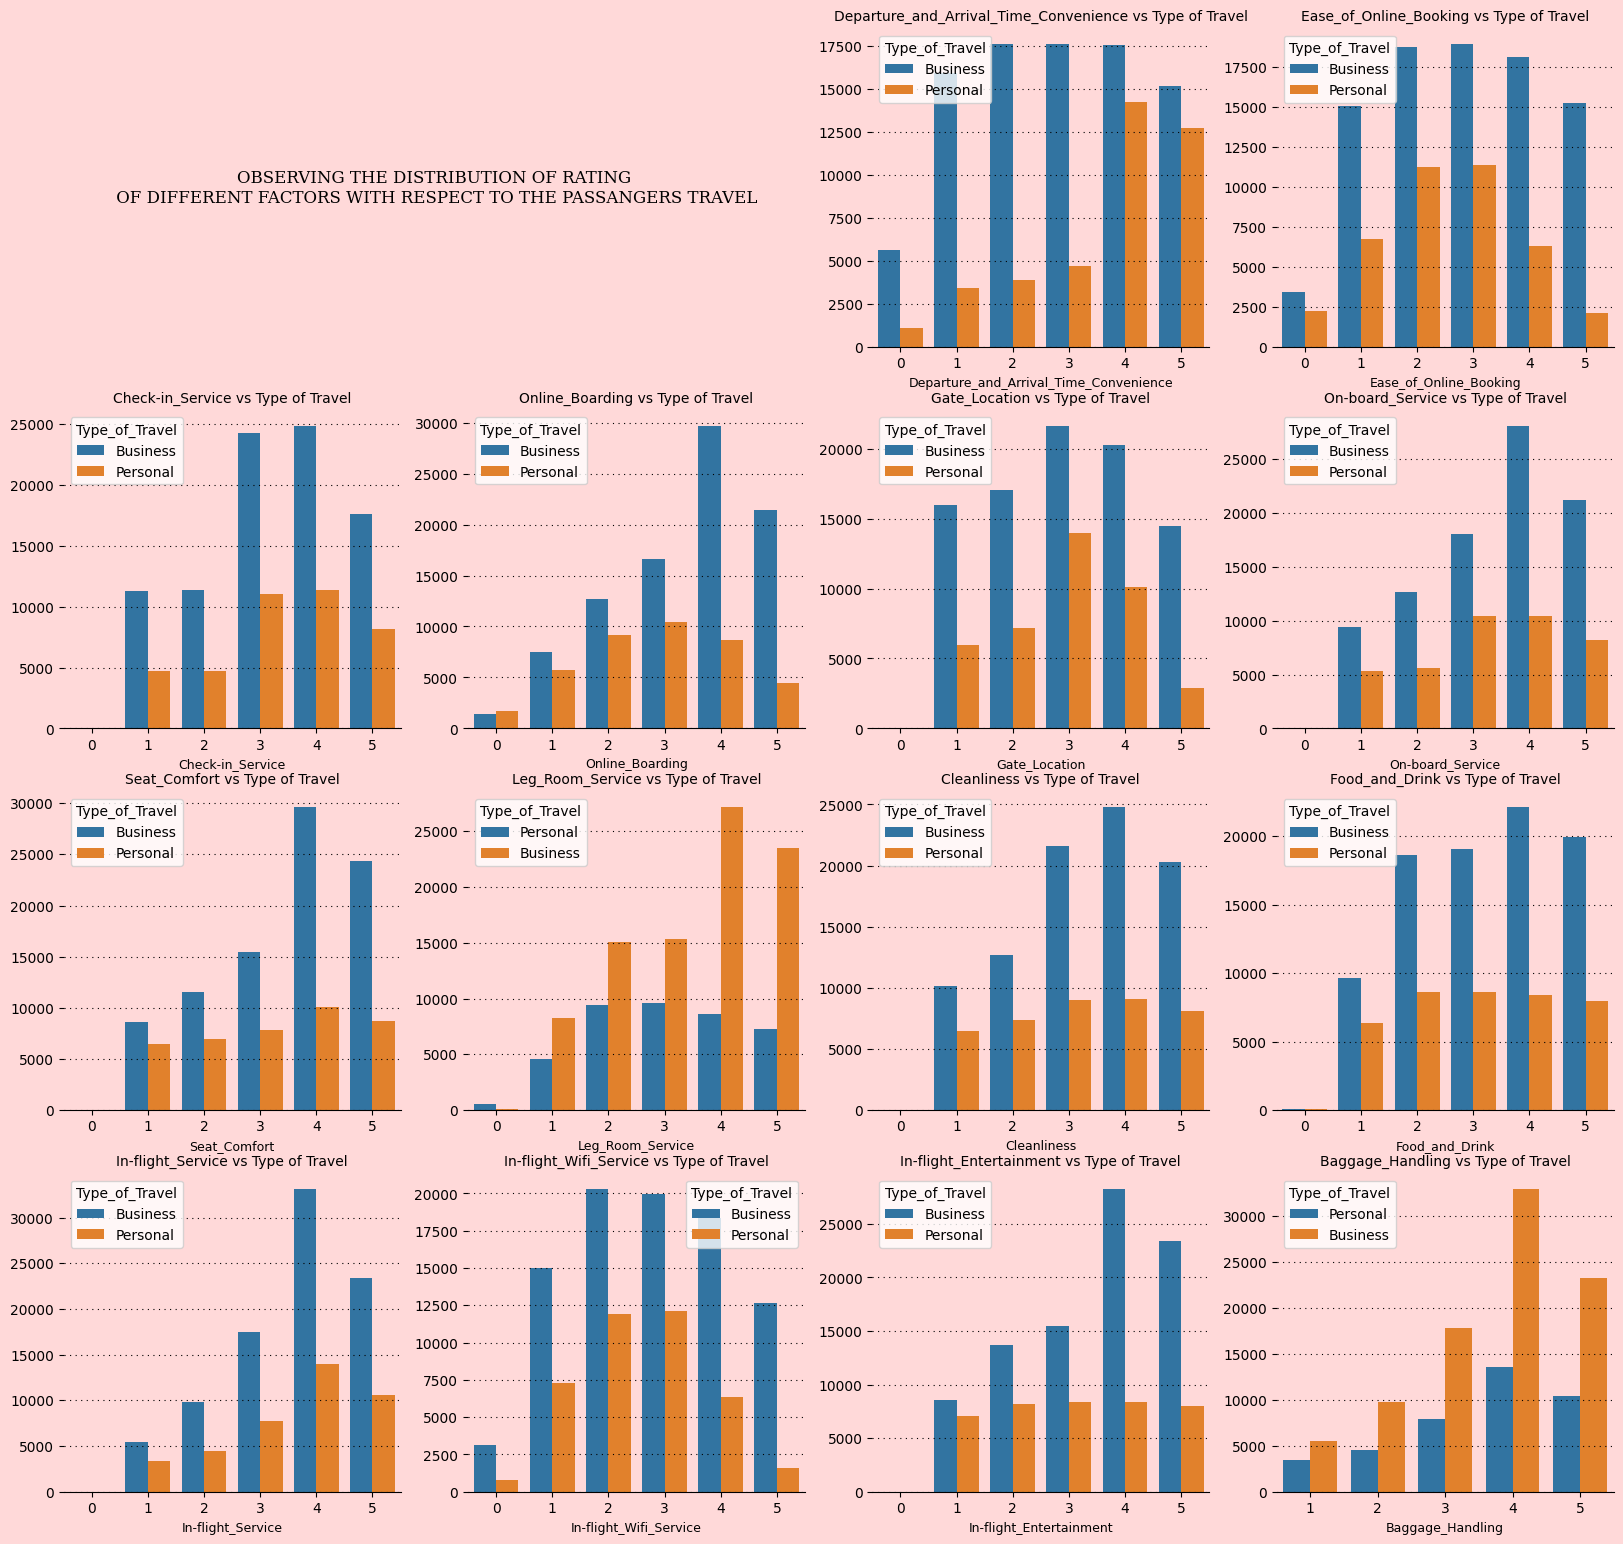

In [27]:
#DISTRIBUTION OF QUALITITATIVE VARIABLE WITH LESS THAN 10 NUMERICAL COLUMN
fig=plt.figure(figsize=(20,19))
specs=fig.add_gridspec(4,4)
spec.update(wspace=0.3, hspace=0.3)
sec1=fig.add_subplot(specs[0,:2])
sec2=fig.add_subplot(specs[0,2])
sec3=fig.add_subplot(specs[0,3])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])
sec7=fig.add_subplot(specs[1,3])
sec8=fig.add_subplot(specs[2,0])
sec9=fig.add_subplot(specs[2,1])
sec10=fig.add_subplot(specs[2,2])
sec11=fig.add_subplot(specs[2,3])
sec12=fig.add_subplot(specs[3,0])
sec13=fig.add_subplot(specs[3,1])
sec14=fig.add_subplot(specs[3,2])
sec15=fig.add_subplot(specs[3,3])

# adding the face color
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]:
  sec.set_facecolor('#ffd9d9')

#list of section of graph
section=[sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]

#plotting the countgraph
cnt=1
for col in numeric_colmn:
  if df[col].nunique()<10:
    sns.countplot(data=df,x=col,ax=section[cnt],hue='Type_of_Travel')
    section[cnt].set_title(f"{col} vs Type of Travel",size=10)
    section[cnt].set_xlabel(col,size=9)
    section[cnt].set_ylabel('')
    section[cnt].grid(axis='y',ls=":",dashes=(1,4),color='black')
    cnt+=1

#OBSERVATION
sec1.text(0.5,0.5,"OBSERVING THE DISTRIBUTION OF RATING\n OF DIFFERENT FACTORS WITH RESPECT TO THE PASSANGERS TRAVEL",
          ha='center',va='center',size=12,fontfamily='serif')

#removing axis for observation
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

#removing spines for the plot
for sec in section :
  for position in ['bottom','right','left','top']:
    if sec != sec1 and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)


plt.show()

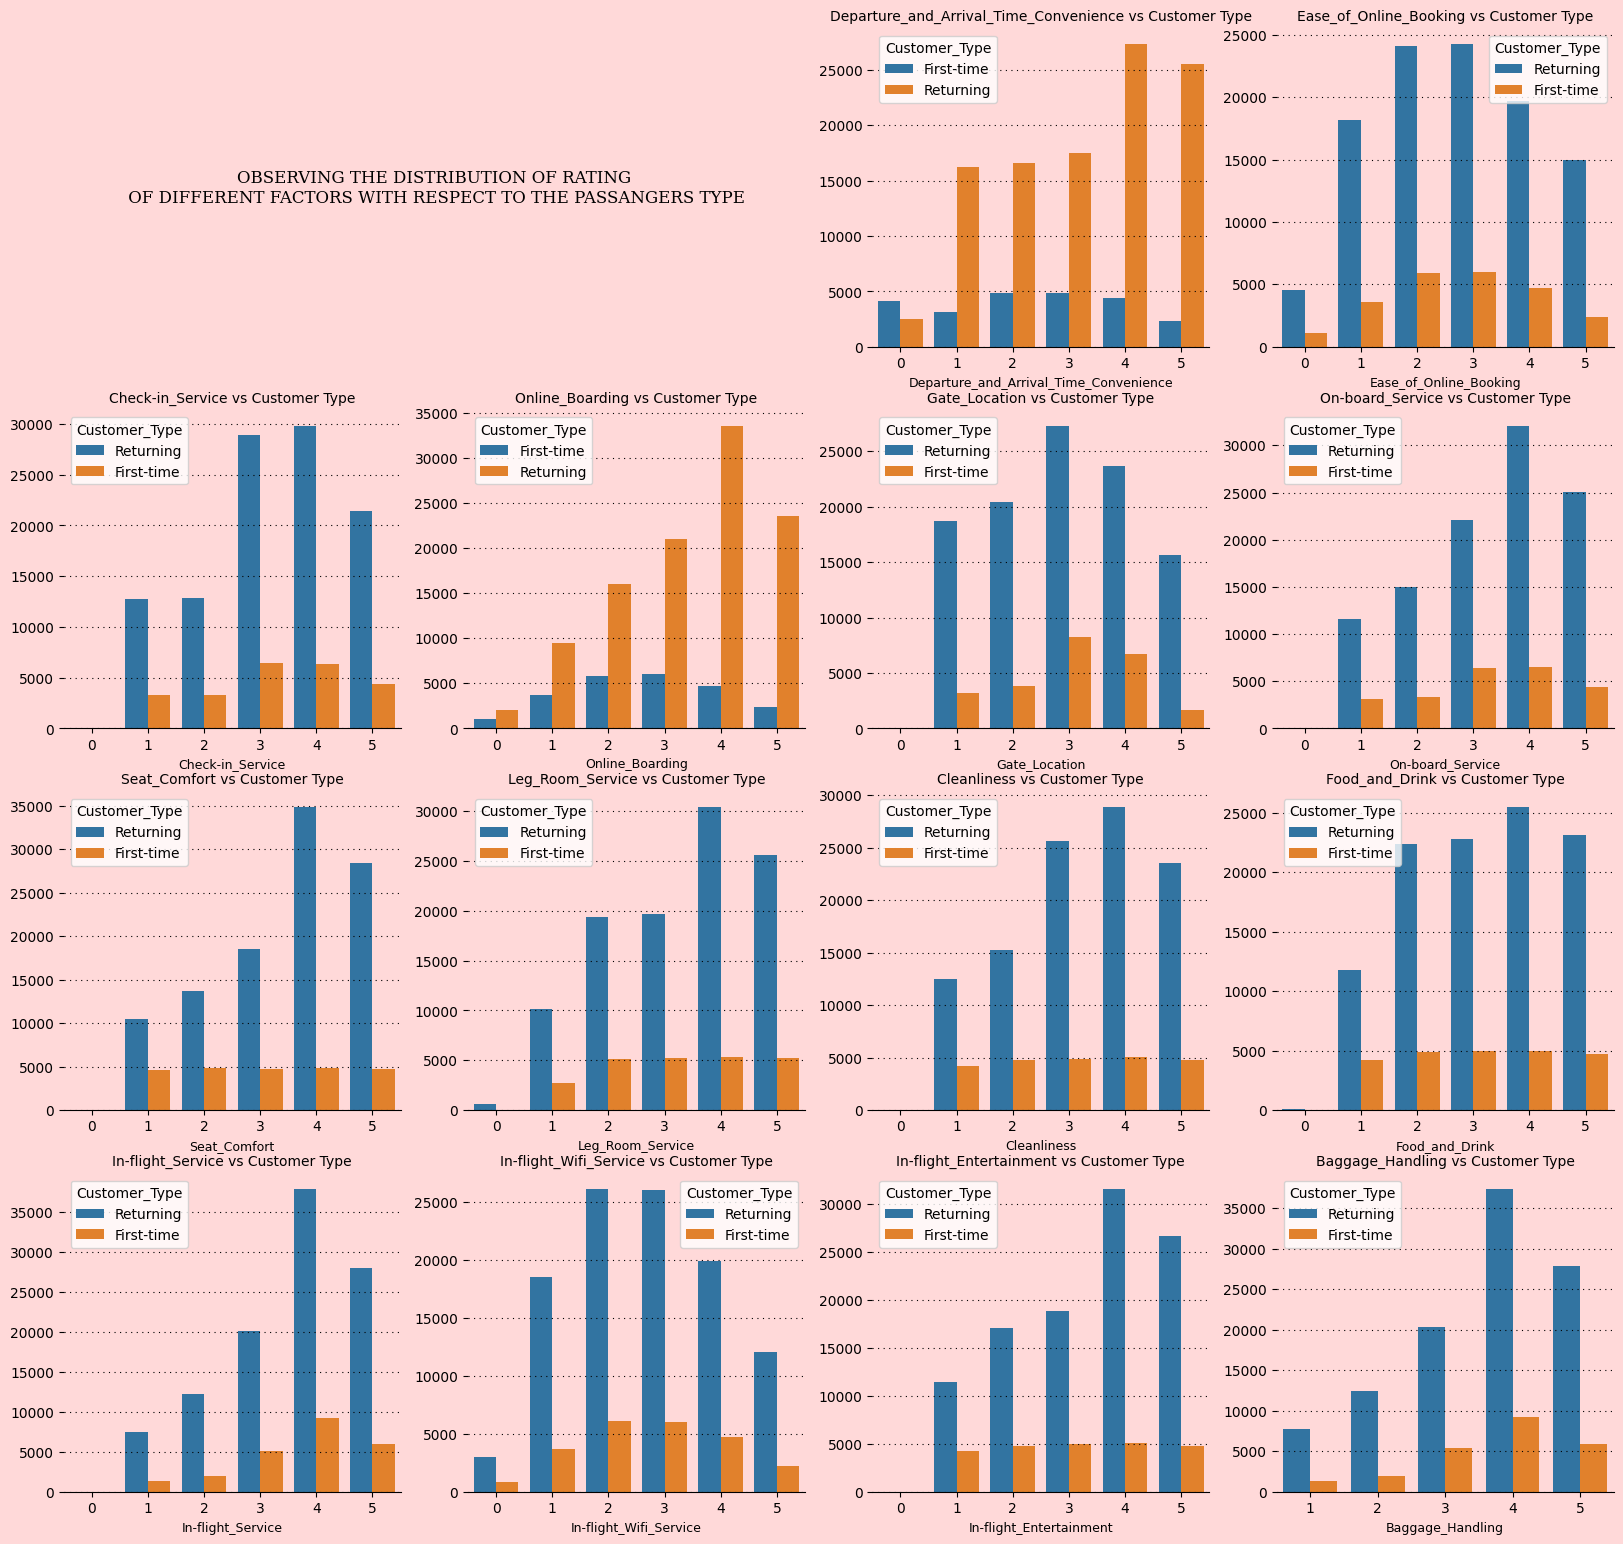

In [28]:
#DISTRIBUTION OF QUALITITATIVE VARIABLE WITH LESS THAN 10 NUMERICAL COLUMN
fig=plt.figure(figsize=(20,19))
specs=fig.add_gridspec(4,4)
spec.update(wspace=0.3, hspace=0.3)
sec1=fig.add_subplot(specs[0,:2])
sec2=fig.add_subplot(specs[0,2])
sec3=fig.add_subplot(specs[0,3])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])
sec7=fig.add_subplot(specs[1,3])
sec8=fig.add_subplot(specs[2,0])
sec9=fig.add_subplot(specs[2,1])
sec10=fig.add_subplot(specs[2,2])
sec11=fig.add_subplot(specs[2,3])
sec12=fig.add_subplot(specs[3,0])
sec13=fig.add_subplot(specs[3,1])
sec14=fig.add_subplot(specs[3,2])
sec15=fig.add_subplot(specs[3,3])

# adding the face color
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]:
  sec.set_facecolor('#ffd9d9')

#list of section of graph
section=[sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]

#plotting the countgraph
cnt=1
for col in numeric_colmn:
  if df[col].nunique()<10:
    sns.countplot(data=df,x=col,ax=section[cnt],hue='Customer_Type')
    section[cnt].set_title(f"{col} vs Customer Type",size=10)
    section[cnt].set_xlabel(col,size=9)
    section[cnt].set_ylabel('')
    section[cnt].grid(axis='y',ls=":",dashes=(1,4),color='black')
    cnt+=1

#OBSERVATION
sec1.text(0.5,0.5,"OBSERVING THE DISTRIBUTION OF RATING\n OF DIFFERENT FACTORS WITH RESPECT TO THE PASSANGERS TYPE",
          ha='center',va='center',size=12,fontfamily='serif')

#removing axis for observation
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

#removing spines for the plot
for sec in section :
  for position in ['bottom','right','left','top']:
    if sec != sec1 and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)

plt.show()

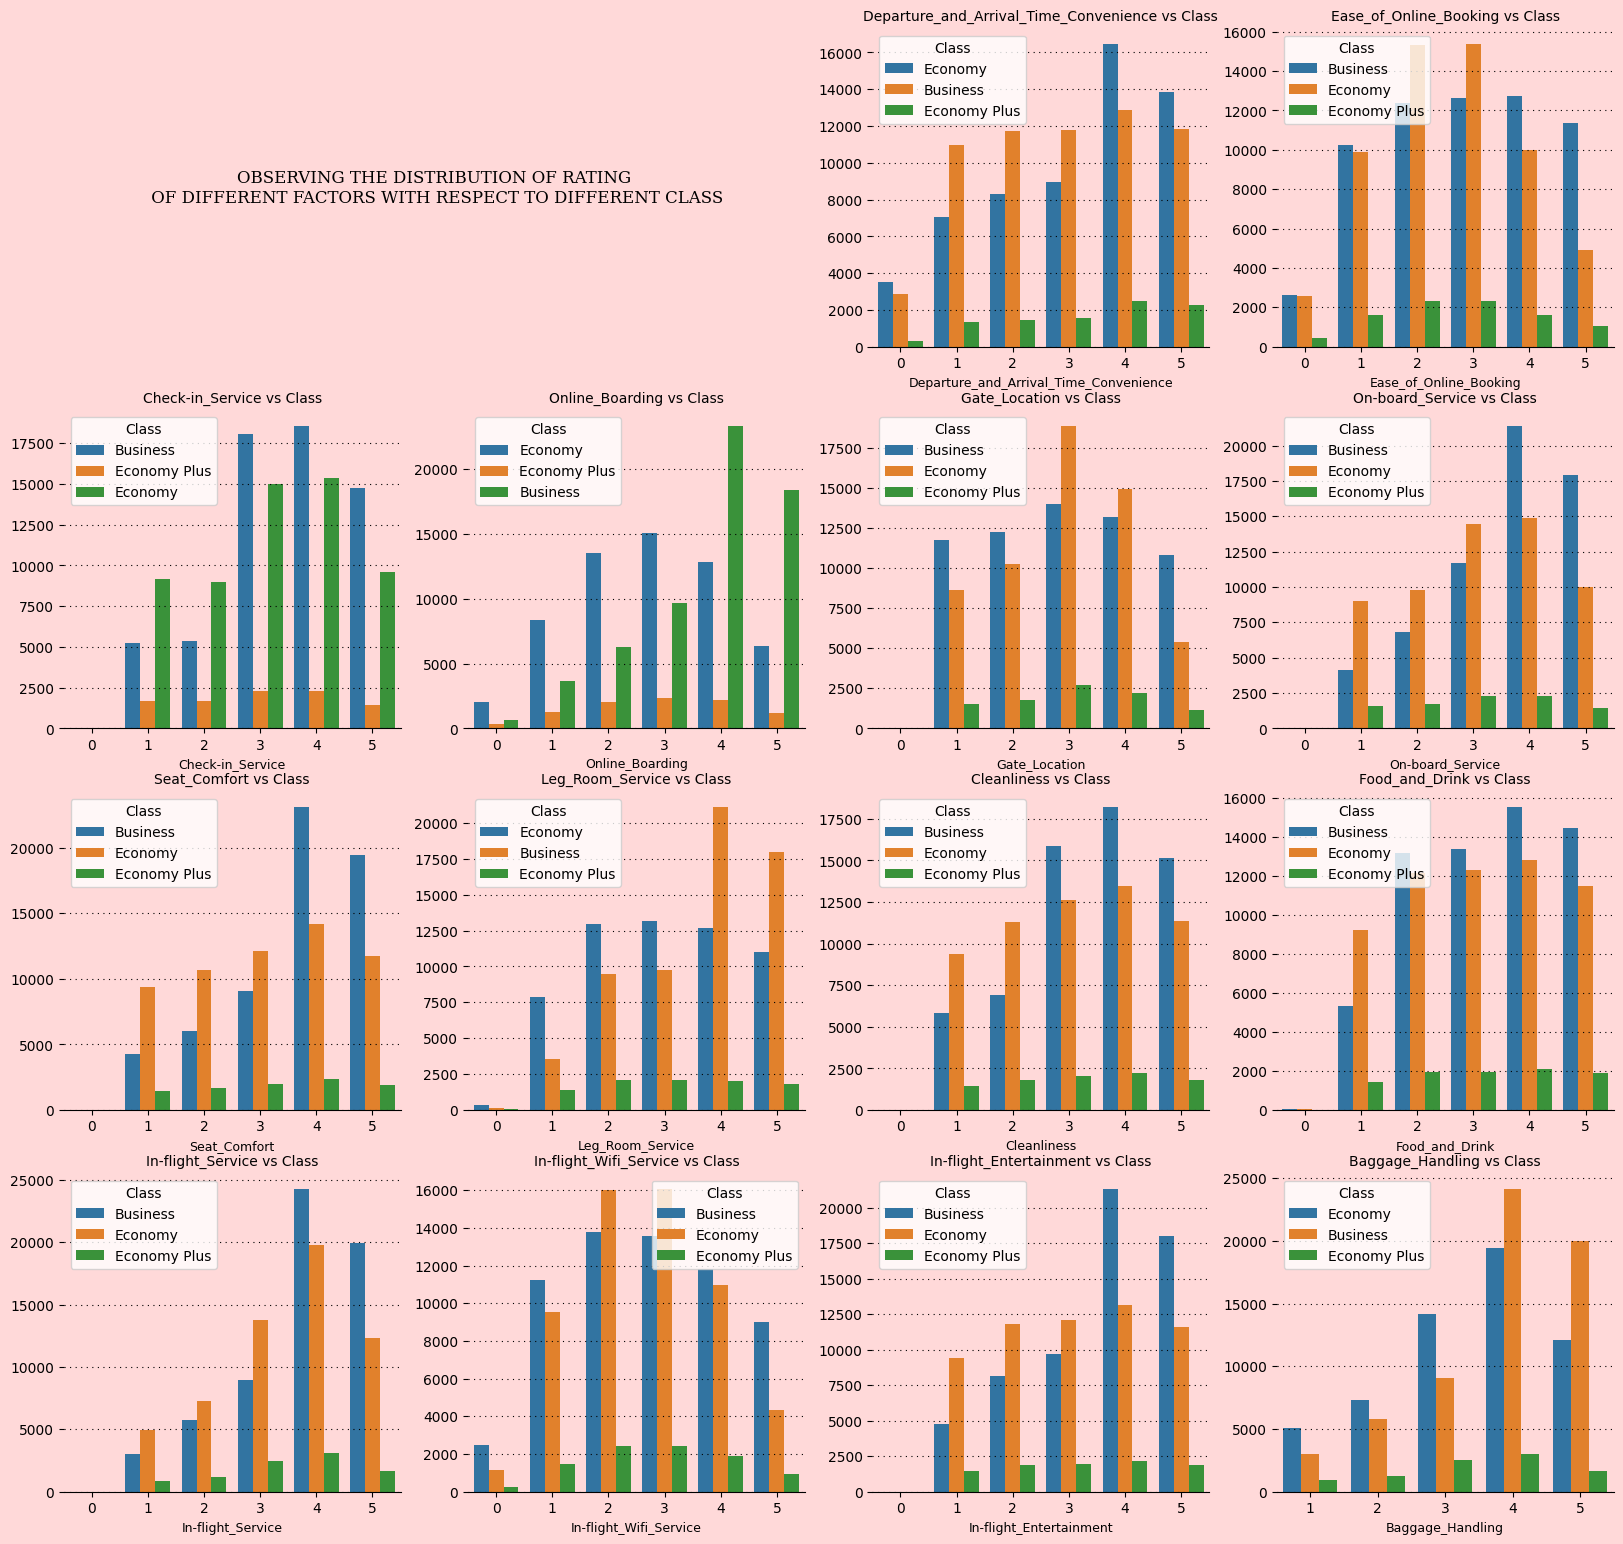

In [29]:
#DISTRIBUTION OF QUALITITATIVE VARIABLE WITH LESS THAN 10 NUMERICAL COLUMN
fig=plt.figure(figsize=(20,19))
specs=fig.add_gridspec(4,4)
spec.update(wspace=0.3, hspace=0.3)
sec1=fig.add_subplot(specs[0,:2])
sec2=fig.add_subplot(specs[0,2])
sec3=fig.add_subplot(specs[0,3])
sec4=fig.add_subplot(specs[1,0])
sec5=fig.add_subplot(specs[1,1])
sec6=fig.add_subplot(specs[1,2])
sec7=fig.add_subplot(specs[1,3])
sec8=fig.add_subplot(specs[2,0])
sec9=fig.add_subplot(specs[2,1])
sec10=fig.add_subplot(specs[2,2])
sec11=fig.add_subplot(specs[2,3])
sec12=fig.add_subplot(specs[3,0])
sec13=fig.add_subplot(specs[3,1])
sec14=fig.add_subplot(specs[3,2])
sec15=fig.add_subplot(specs[3,3])

# adding the face color
for sec in [fig,sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]:
  sec.set_facecolor('#ffd9d9')

#list of section of graph
section=[sec1,sec2,sec3,sec4,sec5,sec6,sec7,sec8,sec9,sec10,sec11,sec12,sec13,sec14,sec15]

#plotting the countgraph
cnt=1
for col in numeric_colmn:
  if df[col].nunique()<10:
    sns.countplot(data=df,x=col,ax=section[cnt],hue='Class')
    section[cnt].set_title(f"{col} vs Class",size=10)
    section[cnt].set_xlabel(col,size=9)
    section[cnt].set_ylabel('')
    section[cnt].grid(axis='y',ls=":",dashes=(1,4),color='black')
    cnt+=1

#OBSERVATION
sec1.text(0.5,0.5,"OBSERVING THE DISTRIBUTION OF RATING\n OF DIFFERENT FACTORS WITH RESPECT TO DIFFERENT CLASS",
          ha='center',va='center',size=12,fontfamily='serif')

#removing axis for observation
sec1.xaxis.set_visible(False)
sec1.yaxis.set_visible(False)

#removing spines for the plot
for sec in section :
  for position in ['bottom','right','left','top']:
    if sec != sec1 and position=='bottom':
      continue
    else:
      sec.spines[position].set_visible(False)

plt.show()

# MULTIVARIATE ANALYSIS

In [30]:
# Correlation table
cor=df.corr(numeric_only=True)
cor

,Age,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,Check-in_Service,Online_Boarding,Gate_Location,On-board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In-flight_Service,In-flight_Wifi_Service,In-flight_Entertainment,Baggage_Handling
Age,1.000000,0.099871,-0.009400,-0.011402,0.036780,0.022294,0.033192,0.207489,-0.000712,0.056744,0.159239,0.038995,0.052584,0.023292,-0.051778,0.015779,0.074993,-0.048192
Flight_Distance,0.099871,1.000000,0.001578,-0.002377,-0.018893,0.064967,0.073619,0.215069,0.005388,0.111219,0.157812,0.134534,0.095642,0.057119,0.059190,0.006561,0.130523,0.064807
Departure_Delay,-0.009400,0.001578,1.000000,0.964527,0.001026,-0.005072,-0.018863,-0.020061,0.006208,-0.031100,-0.027984,0.014009,-0.014747,-0.029748,-0.054623,-0.015904,-0.027072,-0.004659
Arrival_Delay,-0.011402,-0.002377,0.964527,1.000000,-0.000554,-0.006799,-0.021954,-0.023483,0.005909,-0.035440,-0.030805,0.010989,-0.016747,-0.032115,-0.060184,-0.017625,-0.030163,-0.008200
Departure_and_Arrival_Time_Convenience,0.036780,-0.018893,0.001026,-0.000554,1.000000,0.437694,0.091220,0.072186,0.447410,0.067051,0.008708,0.010643,0.010023,0.001060,0.072160,0.344842,-0.008196,0.070649
Ease_of_Online_Booking,0.022294,0.064967,-0.005072,-0.006799,0.437694,1.000000,0.008837,0.404956,0.460154,0.039044,0.028603,0.109349,0.015151,0.030640,0.035352,0.714887,0.046664,0.039217
Check-in_Service,0.033192,0.073619,-0.018863,-0.021954,0.091220,0.008837,1.000000,0.204209,-0.039286,0.244622,0.189821,0.152708,0.176594,0.085083,0.237741,0.043849,0.119660,0.234734
Online_Boarding,0.207489,0.215069,-0.020061,-0.023483,0.072186,0.404956,0.204209,1.000000,0.002586,0.154267,0.419170,0.123136,0.329328,0.233519,0.073981,0.457434,0.284019,0.083559
Gate_Location,-0.000712,0.005388,0.006208,0.005909,0.447410,0.460154,-0.039286,0.002586,1.000000,-0.029107,0.002500,-0.005139,-0.006058,-0.002817,0.000334,0.338546,0.002750,0.001099
On-board_Service,0.056744,0.111219,-0.031100,-0.035440,0.067051,0.039044,0.244622,0.154267,-0.029107,1.000000,0.130655,0.357873,0.122208,0.057475,0.551466,0.120032,0.418870,0.520399


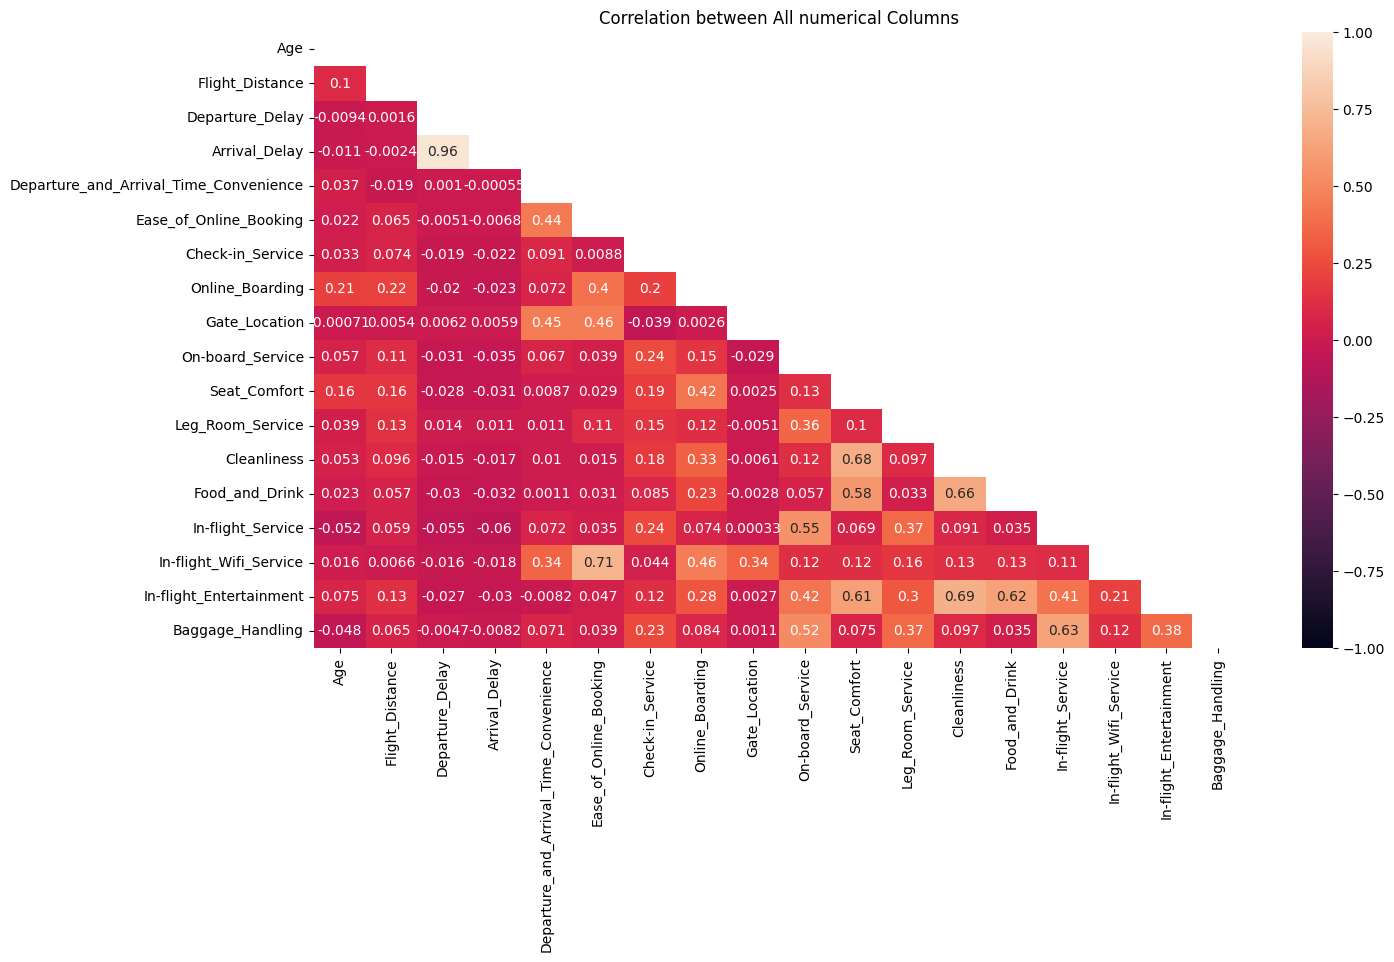

In [31]:
# Figure size
plt.figure(figsize=(15,8))

# extrating only the upper values from correlation table
upper=np.triu(cor)

#heatmap
sns.heatmap(cor,mask=upper,
            annot=True,
            vmin=-1,vmax=1)
plt.title("Correlation between All numerical Columns")

plt.show()

# OBSERVATION FROM BIVARIATE ANALYSIS
### I considered average rating as 3 and done my analysis and below it's rating needs more attention

- Almost evering rating are in same pattern between different passengers in type of travel except Wifi serice, In flight Entertainment, leg room service, Onboard Boading, Ease of Online booking.
- Departure and Arrival Time Convenience has more counts in less rating as compared to average rating(3) for Business Types of Travel Passengers
- Passanger travelling for first time needs more attention because their rating for 4 and 5 in most factor is very low.
- Economy Class Passenger has low 5 rating for Gate Locating compared to other class.
- Except business class others class passenger has more rating for Leg and Room Service less than average.
- In Food and Drink variable the count of rating 2 is approximately same to respect to above numbers.

# SUGGESTIONS
- Online Registration for flight should be more convenient for passenger and needs to be improved.
- More Focus and improvement need on Economy class.
- Upgrade Entertainment factor.
- Passenger travelling for first time needs more attention and care.
- Overall WiFi service can be improved.
- Leg and Room Service can be improved for economy and economyplus passengers.
- Food and Drinks needs to be improved or changed for all passengers.

In [32]:
# dropping the arrival columns due to multicollinearity

df.drop('Arrival_Delay',axis=1,inplace=True)

# Outlier Treatment

In [33]:
# treating the outlier for all numerical columns
for col in df.columns:
  if df[col].dtype != 'O':
    quantile1=df[col].quantile(0.25)
    quantile3=df[col].quantile(0.75)

    # inter quartile range
    iqr=quantile3 - quantile1

    #calculating lower and upper fence
    lower_fence=quantile1 - 1.5 * iqr
    upper_fence=quantile3 + 1.5 *iqr

    # using clip method to treat outlier
    df[col]=df[col].clip(lower=lower_fence, upper=upper_fence)

# Preprocessing

In [34]:
# mapping all categorical values into numerical values for target feature
df['Satisfaction']=df['Satisfaction'].map({'Neutral or Dissatisfied':1,'Satisfied':0})

## train_test_split

In [35]:
# extracting independent and dependent columns
x=df.iloc[:,:-1]
y=df['Satisfaction']

# train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,stratify=y)

# Encoding
- Converting all categorical column into numerical column

In [36]:
# extracting all category columns
category_column=[col for col in x_train.columns if x_train[col].dtype=='O']

# creating object
encoder=OneHotEncoder(sparse_output=False,dtype=int,drop='first')

#training independent dataset
xtrain_array=encoder.fit_transform(x_train[category_column])
encoded_xtrain_df=pd.DataFrame(xtrain_array,index=x_train.index,columns=encoder.get_feature_names_out())
x_train=pd.concat([x_train.drop(category_column,axis=1),encoded_xtrain_df],axis=1)

#testing independent dataset
xtest_array=encoder.transform(x_test[category_column])
encoded_xtest_df=pd.DataFrame(xtest_array,index=x_test.index,columns=encoder.get_feature_names_out())
x_test=pd.concat([x_test.drop(category_column,axis=1),encoded_xtest_df],axis=1)

## Scaling

In [37]:
# Scaling for distance based model
scaler=StandardScaler()

# training dataset
scaled_xtrain=scaler.fit_transform(x_train)

# testing dataset
scaled_xtest=scaler.transform(x_test)

# Model Selection

In [38]:
# function to print score for the model
def model_score(model):
  print("Best Parameters for model")
  print(model.best_params_,"\n")
  print("Best score for model with the optimum parameter")
  print(model.best_score_,"\n")
  print("Best Estimators for model")
  print(model.best_estimator_)

## Decision Tree

### Hyper Parameter Tuning

In [39]:
# algorithm to consider
DTmodel=DecisionTreeClassifier(random_state=42)

# parameters
DTparameters={'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[8,10,15,17,19,20],
              'min_samples_split':list(range(2,20,2)),
              'min_samples_leaf':list(range(1,9)),
              }

# implementing GridSearchCV
DTcv_model=GridSearchCV(estimator=DTmodel,
                        param_grid=DTparameters,
                        n_jobs=-1,
                        verbose=1,
                        cv=5)

# Fitting the GridSearch CV
DTcv_model.fit(x_train,y_train)
print("Decision Tree Classifier")
model_score(DTcv_model)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Decision Tree Classifier
Best Parameters for model
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 18, 'splitter': 'best'} 

Best score for model with the optimum parameter
0.9525912950054867 

Best Estimators for model
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=18,
                       random_state=42)


### Decision TREE Model

In [40]:
# Building the model with optimum parameters
DTbest_parameters=DTcv_model.best_params_
DT=DecisionTreeClassifier(**DTbest_parameters)

# Training the model
DT.fit(x_train,y_train)

# Accuracy Score
print("Decision Tree\n")
print("Training score : ",DT.score(x_train,y_train),"\n")
DTpred=DT.predict(x_test)
print("Testing score : ",accuracy_score(y_test,DTpred),"\n")

# Printing the metrics
print("Confusion Matrix")
print(confusion_matrix(y_test,DTpred),"\n")

print("classificaation_report")
print(classification_report(y_test,DTpred))

Decision Tree

Training score :  0.9645464561902114 

Testing score :  0.9515939700976153 

Confusion Matrix
[[13182   884]
 [  683 17623]] 

classificaation_report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14066
           1       0.95      0.96      0.96     18306

    accuracy                           0.95     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.95      0.95      0.95     32372



In [41]:
# Calculating auc_roc_score
DTproba=DT.predict_proba(x_test)[:,1]
DTscore=roc_auc_score(y_test,DTproba)
print("roc_auc_score for Decision Tree :\n")
print(DTscore)
DTfpr,DTtpr,DTthr=roc_curve(y_test,DTproba)

roc_auc_score for Decision Tree :

0.984558724257414


## KNN

### Hyper Parameter Tuning

In [42]:
# estimator
KNNmodel=KNeighborsClassifier()

# parameters
KNNparameters={'n_neighbors':list(range(2,6)),
              'weights':['uniform','distance'],
              'metric':['minkowski'],
              'p':[1,2]
              }

# implementing GridSearchCV
KNNcv_model=GridSearchCV(estimator=KNNmodel,
                        param_grid=KNNparameters,
                        n_jobs=-1,
                        verbose=1,
                        cv=5)

# fitting the GridSearchCV
KNNcv_model.fit(scaled_xtrain,y_train)
print("Decision Tree Classifier\n")
model_score(KNNcv_model)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Decision Tree Classifier

Best Parameters for model
{'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

Best score for model with the optimum parameter
0.9356110938883567 

Best Estimators for model
KNeighborsClassifier(p=1, weights='distance')


### KNN Model

In [43]:
# Building the model with optimum parameters
KNNbest_parameters=KNNcv_model.best_params_
KNN=KNeighborsClassifier(**KNNbest_parameters)

# Training the model
KNN.fit(scaled_xtrain,y_train)

# Accuracy Score
print("KNeighbors Classifier\n")
print("Training score : ",KNN.score(scaled_xtrain,y_train),"\n")
KNNpred=KNN.predict(scaled_xtest)
print("Testing score : ",accuracy_score(y_test,KNNpred),"\n")

#Printing all the metrics
print("Confusion Matrix")
print(confusion_matrix(y_test,KNNpred),"\n")

print("Classification Report")
print(classification_report(y_test,KNNpred))

KNeighbors Classifier

Training score :  1.0 

Testing score :  0.9361176325219326 

Confusion Matrix
[[12708  1358]
 [  710 17596]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     14066
           1       0.93      0.96      0.94     18306

    accuracy                           0.94     32372
   macro avg       0.94      0.93      0.93     32372
weighted avg       0.94      0.94      0.94     32372



In [44]:
# Calculating auc_roc_score
KNNproba=KNN.predict_proba(scaled_xtest)[:,1]
KNNscore=roc_auc_score(y_test,KNNproba)
print("roc_auc_score for Decision Tree :\n")
print(KNNscore)
KNNfpr,KNNtpr,KNNthr=roc_curve(y_test,KNNproba)

roc_auc_score for Decision Tree :

0.9750539391104499


## Logistic Regression

### Hyper Paraameter Tuning

In [45]:
# ESTIMATOR
LRmodel=LogisticRegression(random_state=42,n_jobs=-1)

#parameter
LRparameters={'penalty':['l1','l2'],
              'tol':[0.0001,0.00001,0.000001],
              'intercept_scaling':[1],
              'max_iter':[100,200,500],
              'C':[0.01,0.1,1,10,100]}

# GridSeachCV
LRcv_model=GridSearchCV(estimator=LRmodel,
                        param_grid=LRparameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

# fitting the GridSeachCV
LRcv_model.fit(scaled_xtrain,y_train)
print("Logistic Regression\n")
model_score(LRcv_model)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Logistic Regression

Best Parameters for model
{'C': 10, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'tol': 1e-05} 

Best score for model with the optimum parameter
0.8743937602403749 

Best Estimators for model
LogisticRegression(C=10, n_jobs=-1, random_state=42, tol=1e-05)


### Logistic Regression Model

In [46]:
LRbest_parameter=LRcv_model.best_params_
LR=LogisticRegression(**LRbest_parameter,random_state=42,n_jobs=-1)

LR.fit(scaled_xtrain,y_train)

# Accuracy Score
print("Logistic Regression\n")
print("Training score : ",LR.score(scaled_xtrain,y_train),"\n")
LRpred=LR.predict(scaled_xtest)
print("Testing score : ",accuracy_score(y_test,LRpred),"\n")

# printing all the metrics
print("Confusion Matrix")
print(confusion_matrix(y_test,LRpred),"\n")

print("Classification Report")
print(classification_report(y_test,LRpred))

Logistic Regression

Training score :  0.8743731529249431 

Testing score :  0.8734091189917212 

Confusion Matrix
[[11705  2361]
 [ 1737 16569]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     14066
           1       0.88      0.91      0.89     18306

    accuracy                           0.87     32372
   macro avg       0.87      0.87      0.87     32372
weighted avg       0.87      0.87      0.87     32372



In [47]:
# Calculating auc_roc_score
LRproba=LR.predict_proba(scaled_xtest)[:,1]
LRscore=roc_auc_score(y_test,LRproba)
print("roc_auc_score for Decision Tree :\n")
print(LRscore)
LRfpr,LRtpr,LRthr=roc_curve(y_test,LRproba)

roc_auc_score for Decision Tree :

0.9258376358714967


## Naive Bayes Classifier

### Naive Bayes Model

In [48]:
# Model
NB=GaussianNB()
NB.fit(x_train,y_train)

# Accuracy Score
print("Naive Bayes Classifier\n")
print("Training score : ",NB.score(x_train,y_train),"\n")
NBpred=NB.predict(x_test)
print("Testing score : ",accuracy_score(y_test,NBpred),"\n")

# printing all the metrics
print("Confusion Matrix")
print(confusion_matrix(y_test,NBpred),"\n")

print("Classification Report")
print(classification_report(y_test,NBpred))

Naive Bayes Classifier

Training score :  0.8624900888655483 

Testing score :  0.8613616705795132 

Confusion Matrix
[[11351  2715]
 [ 1773 16533]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     14066
           1       0.86      0.90      0.88     18306

    accuracy                           0.86     32372
   macro avg       0.86      0.86      0.86     32372
weighted avg       0.86      0.86      0.86     32372



In [49]:
# Calculating auc_roc_score
NBproba=NB.predict_proba(x_test)[:,1]
NBscore=roc_auc_score(y_test,NBproba)
print("roc_auc_score for Decision Tree :\n")
print(NBscore)
NBfpr,NBtpr,NBthr=roc_curve(y_test,NBproba)

roc_auc_score for Decision Tree :

0.921183331707653


# roc_curve

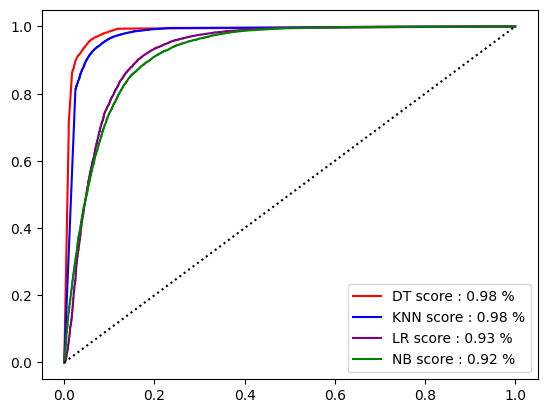

In [50]:
plt.plot(DTfpr,DTtpr,color='red',label=f"DT score : {round(DTscore,2)} %")
plt.plot(KNNfpr,KNNtpr,color='blue',label=f"KNN score : {round(KNNscore,2)} %")
plt.plot(LRfpr,LRtpr,color='purple',label=f"LR score : {round(LRscore,2)} %")
plt.plot(NBfpr,NBtpr,color='green',label=f"NB score : {round(NBscore,2)} %")
plt.plot([0,1],[0,1],ls=":",color='black')
plt.legend()
plt.show()

# CONCLUSION

- In logistic regression though the training score is 100% but its testing is less, its precision and recall score is also less as compared to Decision Tree.
- The data is linear and also Decision Tree gives better prediction,so SVM is not implemented.
- Out of all the model, Decision Tree Classifier has higher precision and recall score for each class of target feature.
- The final model can be created as Decision Tree Classifier.